# kNN- Model on MNIST Dataset

# Name: Abhishek Kumar Sharma
# Student Id: 5037 2679
# Class: MTH 548
# Date: February 20, 2023

# Introduction

$k$-NN algorithm is a machine learning classification model which compares how similar an input is to the $k$ training data points nearest to it and assigns a label to it. It classifies the data point on how its neighbor is classified. Here is how it works:
* Start with training data.
* Given a new data point $x$ compute its distance from all training data points.
* Select $k$ nearest neighbors of $x$ and check their labels.
* The label which appears most often is assigned to point $x$.

We will implement this model on MNIST data set which conatins the images of 60,000 handwritten digits from 0 to 9.

# $k$-NN model Implementation

## Downloading Libraries

In [1]:
from pathlib import Path
import requests
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Part 1: Write a function knn_classifier() which implements the k-NN classification algorithm

In [2]:
# kNN classifier with Euclidean metric
def knn_classifier(training_data, training_labels, x, n):
    mat = np.linalg.norm(training_data - x, axis = 1)    # Calculating euclodean distance
    a = np.argsort(mat)                       # Sorting the elements based on the distance from x
    neighbours = a[:n]                   # n nearest neighbours
    labels = training_labels[neighbours]        # Assigning labels
    label = np.bincount(labels).argmax()     # Counting the most number of labels around the point x
    return label, neighbours

## Part 2. Apply the kNN classifier to the MNIST image dataset

### Downloading MNIST data

In [3]:
def get_MNIST():
    mnist_url = "http://yann.lecun.com/exdb/mnist/"   
    img_file = "train-images-idx3-ubyte.gz"
    labels_file = "train-labels-idx1-ubyte.gz"

    for fname in [img_file, labels_file]:    # Downloading MNIST image and label files
        if Path(fname).is_file() :
            print(f"Found: {fname}")
            continue
        print(f"Downloading: {fname}")
        r = requests.get(mnist_url + fname)
        with open(fname, 'wb') as foo:
            foo.write(r.content)
    # Download Complete
    with gzip.open(img_file, 'rb') as foo:           # Reading Image file
        f = foo.read()
    images = np.array([b for b in f[16:]]).reshape(-1, 28*28)        # Reshaping Image file
    with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as foo:       # Reading Label file
        f = foo.read()
    labels = np.array([b for b in f[8:]]) # Reshaping Label file   
    return images, labels

### Applying the kNN algorithm on MNIST data

In [4]:
# Downloading the MNIST data
images, labels = get_MNIST()

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


#### The program was taking a bit longer to run than expected. Thats why I kept my test data size small.

In [5]:
# Splitting the data into training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.8, random_state=42)
m, n = test_data.shape
predict_labels = np.zeros(m, dtype = int)

# Predicting the labels of the test data set
for i in range(m):
    x = test_data[i]
    labels, neighbours = knn_classifier(training_data, training_labels, x, 17)
    predict_labels[i] = labels

### Creating Confusion matrix and calculating accuracy score

In [6]:
# Compairing the predictions with the test labels using the confusion matrx
from sklearn.metrics import confusion_matrix
c = confusion_matrix(predict_labels, test_labels)

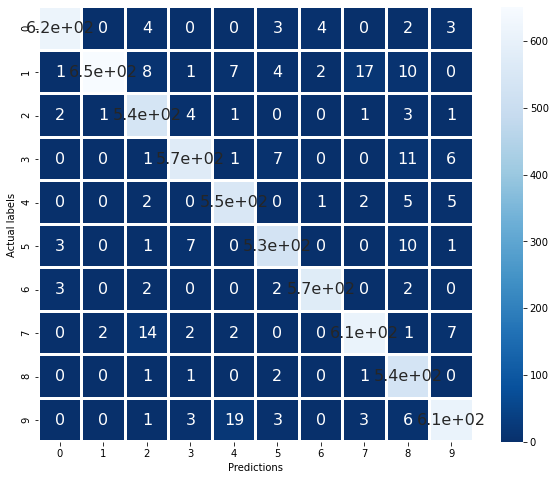

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()

In [8]:
# Calculating the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(predict_labels, test_labels))

Accuracy Score:  0.9635


# Here are some questions which we considered:

### Case 1: How does classification accuracy depend on the size of the training set and the number of neighbors?

Answer: Most of the times size of the training example and number of neighbors increases, the accuracy of the model either increases. As verified in the examples below:

#### Decrease in size of training training data

In [9]:
# Downloading the MNIST data
images, labels = get_MNIST()

# Splitting the data into training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.7, random_state=42)
m, n = test_data.shape
predict_labels = np.zeros(m, dtype = int)

# Predicting the labels of the test data set
for i in range(m):
    x = test_data[i]
    labels, neighbours = knn_classifier(training_data, training_labels, x, 17)
    predict_labels[i] = labels

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [10]:
# Accuracy Score of the above example:
print("Accuracy Score: ", accuracy_score(predict_labels, test_labels))

Accuracy Score:  0.9615


#### Increase in size of training data

In [12]:
# Downloading the MNIST data
images, labels = get_MNIST()

# Splitting the data into training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.9, random_state=42)
m, n = test_data.shape
predict_labels = np.zeros(m, dtype = int)

# Predicting the labels of the test data set
for i in range(m):
    x = test_data[i]
    labels, neighbours = knn_classifier(training_data, training_labels, x, 17)
    predict_labels[i] = labels

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [13]:
# Accuracy Score of the above example:
print("Accuracy Score: ", accuracy_score(predict_labels, test_labels))

Accuracy Score:  0.9645


## Case 2: Various ways of measuring distances between images, and their impact on classification.

In [14]:
# kNN classifier with manhattan metric
def knn_classifier_manhattan(training_data, training_labels, x, n):
    #mat = np.linalg.norm(training_data - x, axis = 1)
    mat = np.sum(np.abs(training_data-x), axis = 1) # Calculating manhattan distance
    a = np.argsort(mat)    # Sorting the elements based on the distance from x
    neighbours = a[:n]     # n nearest neighbours
    labels = training_labels[neighbours]     # Assigning labels
    label = np.bincount(labels).argmax()     # Counting the most number of labels around the point x
    return label, neighbours

# Downloading the MNIST data
images, labels = get_MNIST()

# Splitting the data into training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.8, random_state=42)
m, n = test_data.shape
predict_labels = np.zeros(m, dtype = int)

# Predicting the labels of the test data set
for i in range(m):
    x = test_data[i]
    labels, neighbours = knn_classifier(training_data, training_labels, x, 17)
    predict_labels[i] = labels

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [15]:
# Accuracy Score of the above example:
print("Accuracy Score: ", accuracy_score(predict_labels, test_labels))

Accuracy Score:  0.9635


## Case 3: kNN model with manhattan metric after decrease in training data size

In [16]:
# kNN classifier with manhattan metric
def knn_classifier_manhattan(training_data, training_labels, x, n):
    #mat = np.linalg.norm(training_data - x, axis = 1)
    mat = np.sum(np.abs(training_data-x), axis = 1) # Calculating manhattan distance
    a = np.argsort(mat)    # Sorting the elements based on the distance from x
    neighbours = a[:n]     # n nearest neighbours
    labels = training_labels[neighbours]     # Assigning labels
    label = np.bincount(labels).argmax()     # Counting the most number of labels around the point x
    return label, neighbours

# Downloading the MNIST data
images, labels = get_MNIST()

# Splitting the data into training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.7, random_state=42)
m, n = test_data.shape
predict_labels = np.zeros(m, dtype = int)

# Predicting the labels of the test data set
for i in range(m):
    x = test_data[i]
    labels, neighbours = knn_classifier(training_data, training_labels, x, 17)
    predict_labels[i] = labels

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


In [17]:
# Accuracy Score of the above example:
print("Accuracy Score: ", accuracy_score(predict_labels, test_labels))

Accuracy Score:  0.9615


Answer: The change in the metric has no effect on the accuracy of the model. Both euclidean and manhattan metric gives the same accuracy score for the given training set.

## Analyze examples of images that have not been classified correctly. What went wrong with them? Which digits are confused most often with what other digits?

Answer: Most of the times 4 is confused as 9, 3 is confused with 8 and 7 is confused with 1.

## What fraction of images was correctly classified with perfect certainty, i.e. the images were classified correctly, and all their neighbors had the same label?

We have calculated the same using the accuracy score and confusion matrix above.

## How the accuracy changes with the change in the value of k?

Here we are trying to see how the changes in the number of neighbours change the accuracy of the model

In [33]:
accuracy = np.zeros(5)

k = [5, 7, 11, 15, 17]

# Downloading the MNIST data
images, labels = get_MNIST()
# Splitting the data int training data, test data, training labels and test labels
training_data, test_data, training_labels, test_labels = train_test_split(images, labels, test_size=0.1, train_size= 0.7, random_state=42)
m, n = test_data.shape

for j in range(len(k)):
    predict_labels = np.zeros(m, dtype = int)

    # Predicting the labels of the test data set
    for i in range(m):
        x = test_data[i]
        labels, neighbours = knn_classifier(training_data, training_labels, x, k[j])
        predict_labels[i] = labels
    
    accuracy[j] = accuracy_score(predict_labels, test_labels)

Found: train-images-idx3-ubyte.gz
Found: train-labels-idx1-ubyte.gz


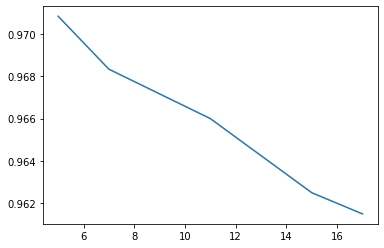

In [38]:
fig, ax = plt.subplots()
ax.plot(k, accuracy)

Answer: The accuracy of the model is decreasing as we increase the number of neighbours from 5 to 17. I implemented the model with k = 17 which is not the best choice for k as we can see in the above graph.

# References

* https://en.wikipedia.org/wiki/MNIST_database
* https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html